In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 6

In [35]:
data = pd.read_csv('~/Downloads/Copier.csv', index_col=0)
data['count'] = 1
data.shape

/Users/HOP/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(1956522, 7)

In [36]:
data.dtypes

SERIAL_NUMBER    object
EVENT_DTM        object
EVENT_CODE       object
SEVERITY         object
PRINT_COUNT       int64
EVENT_FAMILY      int64
count             int64
dtype: object

In [37]:
data['EVENT_DTM'] = pd.to_datetime(data['EVENT_DTM'])
data.dtypes

SERIAL_NUMBER            object
EVENT_DTM        datetime64[ns]
EVENT_CODE               object
SEVERITY                 object
PRINT_COUNT               int64
EVENT_FAMILY              int64
count                     int64
dtype: object

In [38]:
data.isnull().sum()

SERIAL_NUMBER    0
EVENT_DTM        0
EVENT_CODE       0
SEVERITY         0
PRINT_COUNT      0
EVENT_FAMILY     0
count            0
dtype: int64

In [39]:
data.head()

,SERIAL_NUMBER,EVENT_DTM,EVENT_CODE,SEVERITY,PRINT_COUNT,EVENT_FAMILY,count
0,CNBCCCJ1T3,2013-01-01 01:03:55,89.19.5C,ERROR,55564,0,1
1,CNBCCCJ1VP,2013-01-01 01:18:55,89.19.5C,ERROR,48147,0,1
2,CNBVCCH2G7,2013-01-01 03:18:31,89.19.5C,ERROR,34844,0,1
3,CNBCD382GL,2013-01-01 04:36:16,10.00.60,WARNING,11024,0,1
4,CNBVCCQ1GB,2013-01-01 05:15:06,89.19.5C,ERROR,91211,0,1


## Number of Unique Copiers

In [40]:
# len(np.unique(data['SERIAL_NUMBER'].values))
ser_num_counts = data[['SERIAL_NUMBER', 'count']].groupby("SERIAL_NUMBER").sum()
print(ser_num_counts.head())
print('\033[1m' + f'Number of unique copiers: {ser_num_counts.shape[0]}')

               count
SERIAL_NUMBER       
BRBFCC8L11       214
BRBFCDLK0D       470
BRBFCDLK0G       393
BRBFCDLK0J       547
BRBFD1CK1G       384
Number of unique copiers: 10737


## Unique warning event codes

In [41]:
event_codes_num = data[['EVENT_CODE', 'SEVERITY', 'count']]
warn_event_codes = event_codes_num[event_codes_num['SEVERITY']=='WARNING']
warn_event_codes_sum = warn_event_codes.groupby('EVENT_CODE').sum()
print(warn_event_codes_sum.head())
print('\033[1m' + f'Number of unique warning event codes: {warn_event_codes_sum.shape[0]}')

            count
EVENT_CODE       
10.00.00      898
10.00.10    12088
10.00.60    90854
10.00.70    69753
10.26.60     4627
Number of unique warning event codes: 42


## Total number of event codes generated each month

/Users/HOP/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


       count
month       
12     75870
10     75549
9      72814
7      70482
11     69909


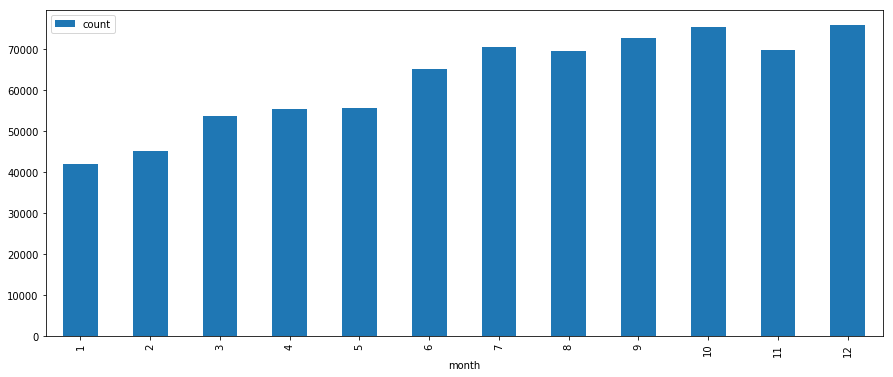

In [51]:
event_codes = data[['EVENT_DTM', 'EVENT_CODE', 'count']]
event_codes_2015 = event_codes[event_codes['EVENT_DTM'].dt.year == 2015]
event_codes_2015['month'] = event_codes_2015['EVENT_DTM'].dt.month
event_codes_per_month = event_codes_2015.groupby('month').sum()
print(event_codes_per_month.sort_values(by='count', ascending=False).head())
event_codes_per_month.plot(kind='bar')
plt.show()

## Serial number of copiers that generated most events in March

In [59]:
ser_num = data[['SERIAL_NUMBER', 'EVENT_DTM', 'EVENT_CODE', 'count']]
ser_num_2016 = ser_num[ser_num['EVENT_DTM'].dt.year == 2016]
ser_num_2016_march = ser_num_2016[ser_num_2016['EVENT_DTM'].dt.month == 3]
ser_num_sum = ser_num_2016_march.groupby(['SERIAL_NUMBER', ]).sum()
ser_num_sum_sorted = ser_num_sum.sort_values(by='count', ascending=False)
print(ser_num_sum_sorted.shape)
ser_num_sum_sorted.head()

(231, 1)


,count
EVENT_CODE,
13.B2.D1,9566
13.A2.D2,9378
41.03.02,5740
13.B2.D2,5692
42.B0.01,5591


## Explain why the number of events per month is increasing

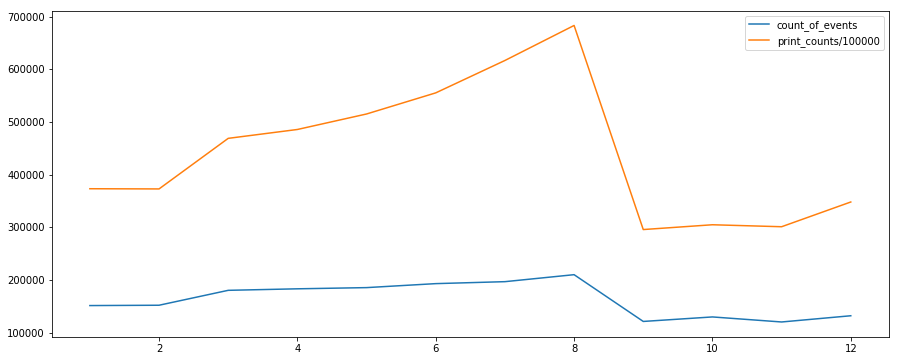

In [73]:
data['month'] = data['EVENT_DTM'].dt.month
data_per_month = data.groupby('month').sum()
# data_per_month.head()
plt.figure()
plt.plot(data_per_month.index, data_per_month['count'], data_per_month.index, data_per_month['PRINT_COUNT']/ 100000)
plt.legend(['count_of_events', 'print_counts/100000'])
plt.show()